In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cells = pd.read_csv('data/cells_no_repeats.csv', index_col=[0])
synapses = pd.read_csv('data/synapses_no_repeats.csv', index_col=[0])

In [3]:
synapses.columns

Index(['pre_pt_root_id', 'post_pt_root_id', 'size', 'ctr_pt_position',
       'cell_type_pre', 'pt_x_pre', 'pt_y_pre', 'pt_z_pre', 'cell_type_post',
       'pt_x_post', 'pt_y_post', 'pt_z_post', 'x_diff', 'y_diff', 'z_diff'],
      dtype='object')

In [10]:
synapses_by_pre = synapses.groupby('pre_pt_root_id')
synapses_by_post = synapses.groupby('post_pt_root_id')

In [17]:
pre_counts = synapses_by_pre.size().to_frame('out_degree')
post_counts = synapses_by_post.size().to_frame('in_degree')

In [19]:
display(pre_counts.nlargest(columns='out_degree', n=5))
display(post_counts.nlargest(columns='in_degree', n=5))

,out_degree
pre_pt_root_id,
864691135428740656,8948
864691135848267614,6403
864691135396725025,5735
864691135501875010,5733
864691136089275959,5511


,in_degree
post_pt_root_id,
864691135876037971,1952
864691135590283019,1632
864691135509054217,1410
864691135800033122,1383
864691135334756585,1369


In [26]:
synapses_by_post_ct = synapses.groupby(['cell_type_post', 'post_pt_root_id',]).size().to_frame('in_degree')
synapses_by_pre_ct = synapses.groupby(['cell_type_pre', 'pre_pt_root_id']).size().to_frame('out_degree')
display(synapses_by_post_ct.head(columns='in_degree', n=5))

in_degree
cell_type_post post_pt_root_id              
23P            864691134884740346          1
               864691134884741626         73
               864691134884749562         90
               864691134884750074         91
               864691134884752122         76

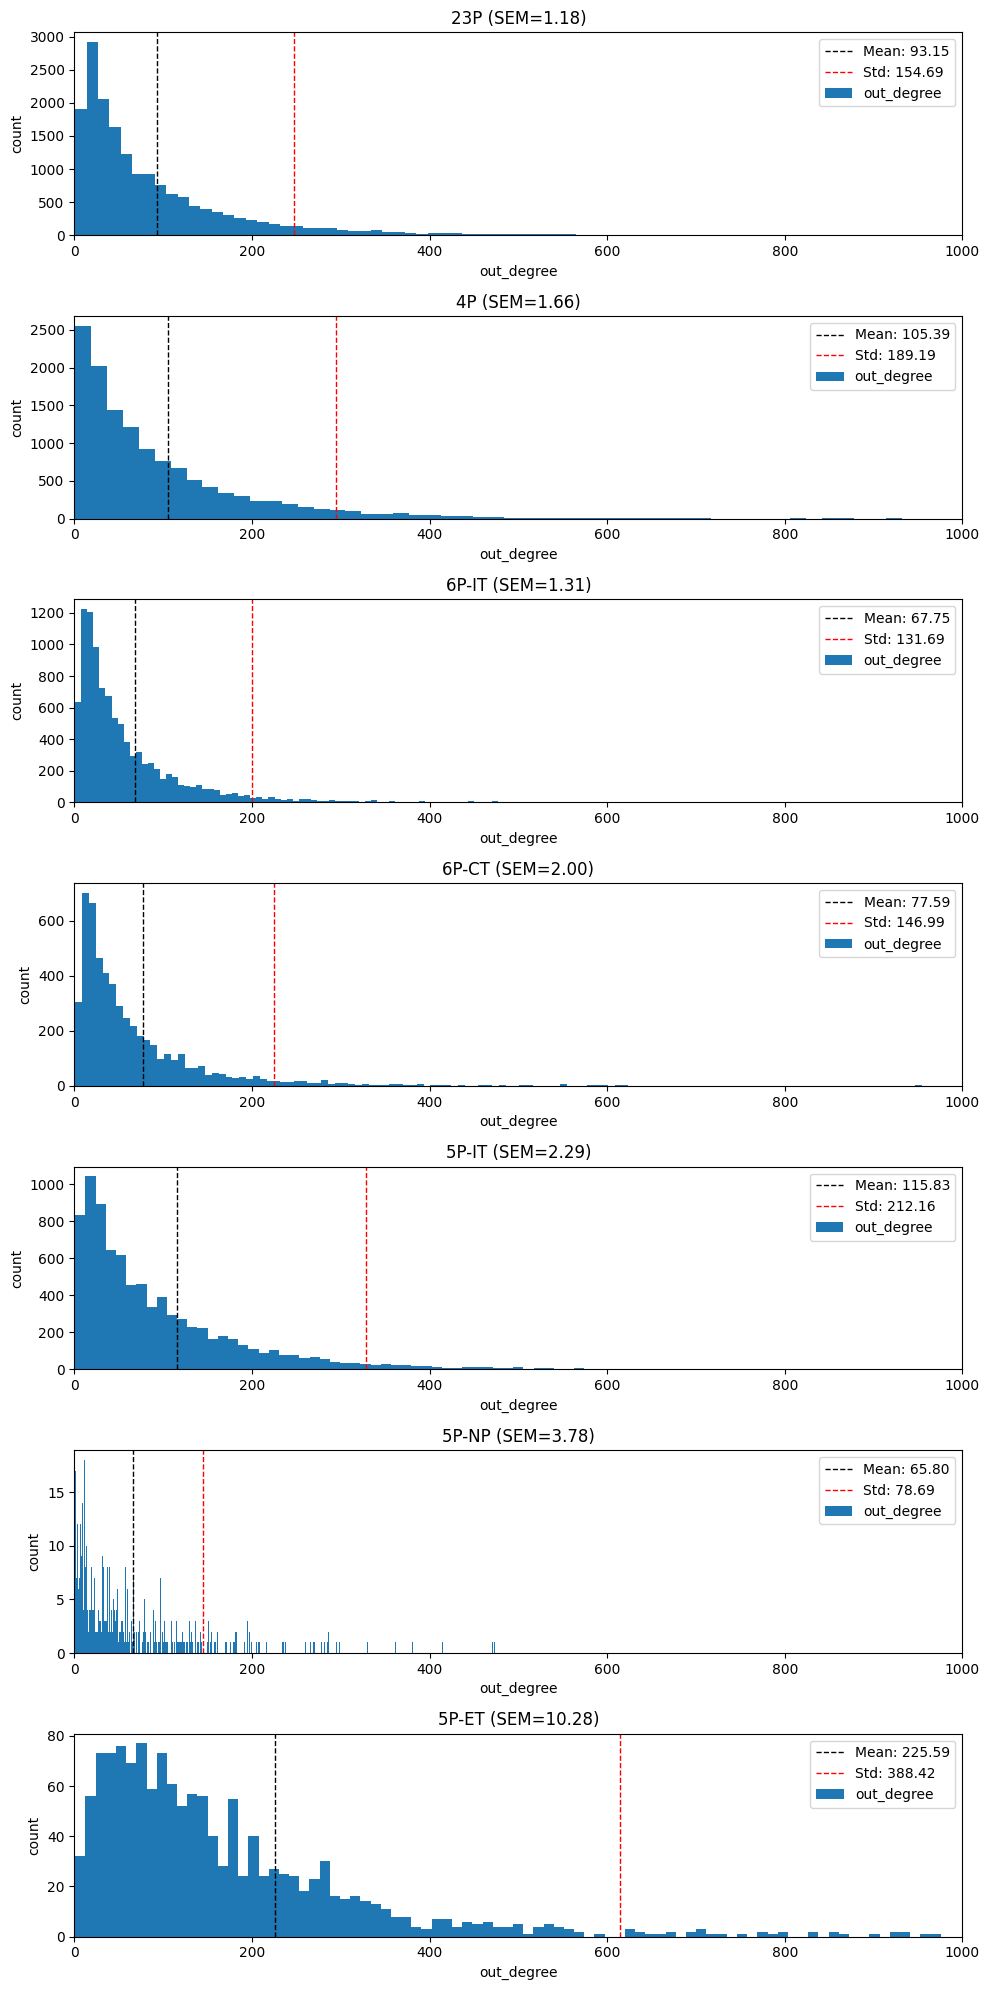

In [60]:
fig, axs = plt.subplots(7, 1, figsize=(10, 20))
cell_types = cells['cell_type'].unique().tolist()

for ax, ct in zip(axs, cell_types):
    synapse_counts = synapses_by_pre_ct.loc[ct]
    counts_mean = float(synapse_counts.mean().iloc[0])
    counts_std = float(synapse_counts.std().iloc[0])
    counts_sem = counts_std / np.sqrt(len(synapse_counts))

    synapse_counts.plot.hist(ax=ax, bins=500, xlim=(0, 1000))

    ax.axvline(counts_mean, color='black', linestyle='dashed', linewidth=1, label=f'Mean: {counts_mean:.2f}')
    ax.axvline(counts_mean + counts_std, color='red', linestyle='dashed', linewidth=1, label=f'Std: {counts_std:.2f}')
    ax.axvline(counts_mean - counts_std, color='red', linestyle='dashed', linewidth=1)

    ax.set_title(f'{ct} (SEM={counts_sem:.2f})')
    ax.set_xlabel('out_degree')
    ax.set_ylabel('count')
    ax.legend()

plt.tight_layout()
plt.show()

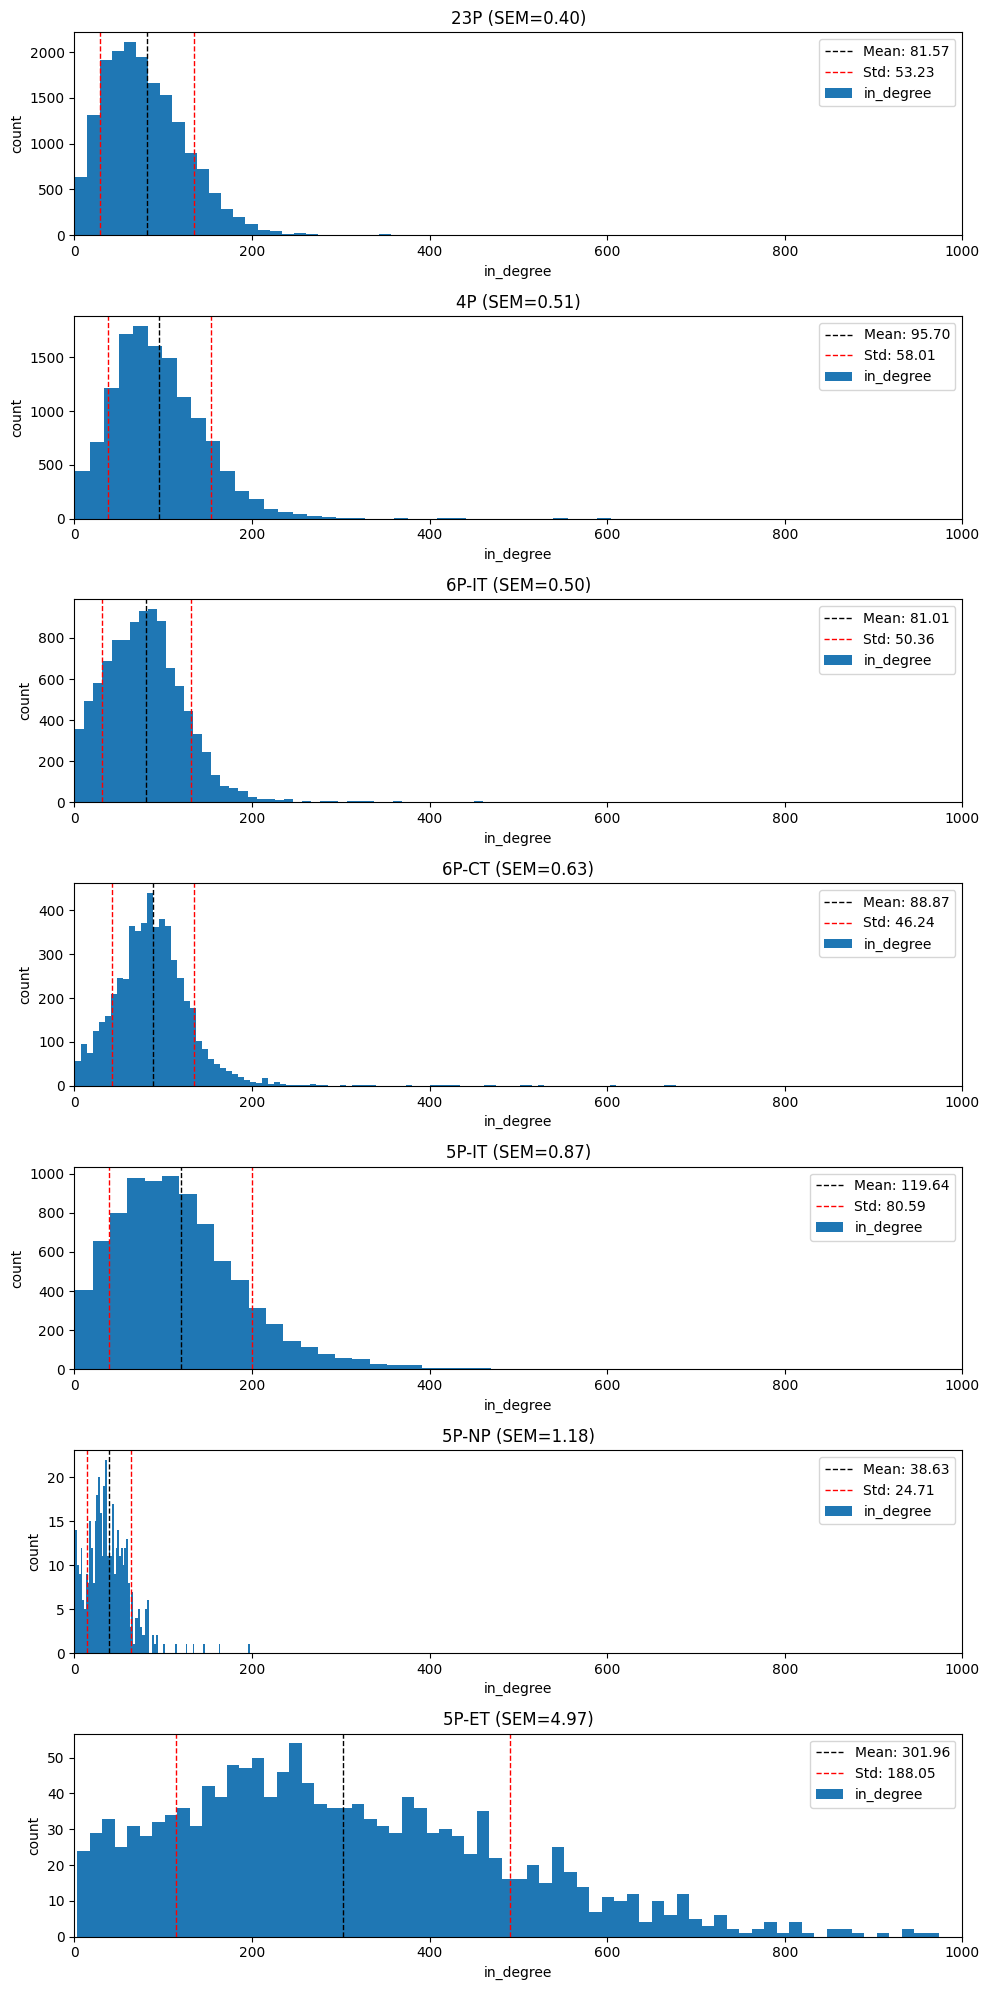

In [56]:
fig, axs = plt.subplots(7, 1, figsize=(10, 20))
cell_types = cells['cell_type'].unique().tolist()

for ax, ct in zip(axs, cell_types):
    synapse_counts = synapses_by_post_ct.loc[ct]
    counts_mean = float(synapse_counts.mean().iloc[0])
    counts_std = float(synapse_counts.std().iloc[0])
    counts_sem = counts_std / np.sqrt(len(synapse_counts))

    synapse_counts.plot.hist(ax=ax, bins=100, xlim=(0, 1000))

    ax.axvline(counts_mean, color='black', linestyle='dashed', linewidth=1, label=f'Mean: {counts_mean:.2f}')
    ax.axvline(counts_mean + counts_std, color='red', linestyle='dashed', linewidth=1, label=f'Std: {counts_std:.2f}')
    ax.axvline(counts_mean - counts_std, color='red', linestyle='dashed', linewidth=1)

    ax.set_title(f'{ct} (SEM={counts_sem:.2f})')
    ax.set_xlabel('in_degree')
    ax.set_ylabel('count')
    ax.legend()

plt.tight_layout()
plt.show()

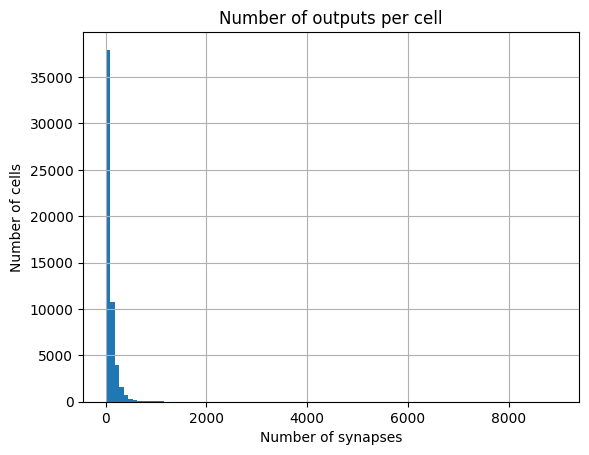

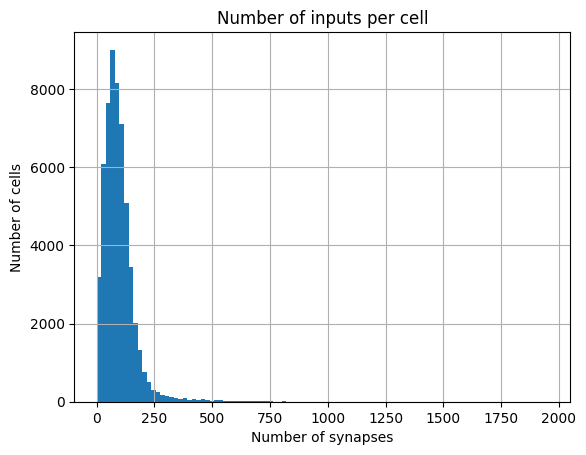

In [13]:
pre_counts.hist(bins=100)
plt.xlabel('Number of synapses')
plt.ylabel('Number of cells')
plt.title('Number of outputs per cell')
plt.show()

post_counts.hist(bins=100)
plt.xlabel('Number of synapses')
plt.ylabel('Number of cells')
plt.title('Number of inputs per cell')
plt.show()

In [61]:
synapses_by_ct = synapses.groupby(['cell_type_post'])
synapse_counts = synapses_by_ct.size().reset_index(name='count')

In [62]:
display(synapses_by_ct.first())

,pre_pt_root_id,post_pt_root_id,size,ctr_pt_position,cell_type_pre,pt_x_pre,pt_y_pre,pt_z_pre,pt_x_post,pt_y_post,pt_z_post,x_diff,y_diff,z_diff
cell_type_post,,,,,,,,,,,,,,
23P,864691135564683351,864691136811959667,960,[159402 92838 18005],23P,139312,142640,18313,197936,120992,19511,-234.496,86.592,-47.92
4P,864691135850460615,864691135544369960,3760,[226118 186894 23218],5P-IT,226352,197136,23621,220064,207568,24033,25.152,-41.728,-16.48
5P-ET,864691135837192851,864691137197197121,25272,[224516 197026 25563],4P,219312,147296,25809,226736,203776,22834,-29.696,-225.920,119.00
5P-IT,864691135858682472,864691135925929998,12096,[244034 201844 23242],6P-IT,203824,222816,26742,227952,207568,21998,-96.512,60.992,189.76
5P-NP,864691134964467743,864691134964467743,236,[216230 207956 24787],5P-NP,215760,207520,24846,215760,207520,24846,0.000,0.000,0.00
6P-CT,864691135864737500,864691135864703196,196,[225492 202020 21043],23P,212352,138224,25629,216272,208224,22075,-15.680,-280.000,142.16
6P-IT,864691135615761513,864691135644665839,1868,[212640 210708 22414],6P-IT,197536,222816,22640,217952,208224,22275,-81.664,58.368,14.60


In [67]:
cell_types = synapse_counts['cell_type_post'].tolist()

# Make a seven by seven matrix of the probability of a synapse between two cell types
synapse_prob = np.zeros((7,7))
for i,ct in enumerate(cell_types):
    for j in range(7):
        synapse_prob[i,j] = synapses_by_ct.get_group(ct).groupby(['cell_type_pre']).size().get(j,0)

In [68]:
# Normalize the matrix so each column sums to one
synapse_prob = synapse_prob / synapse_prob.sum(axis=0, keepdims=True)

# # Normalize the matrix so each row sums to one
# synapse_prob = synapse_prob / synapse_prob.sum(axis=1, keepdims=True)

In [69]:
print(np.sum(synapse_prob, axis=0))

[1. 1. 1. 1. 1. 1. 1.]


Text(0.5, 1.0, 'Fraction of outputs from pre (column) to post (row)')

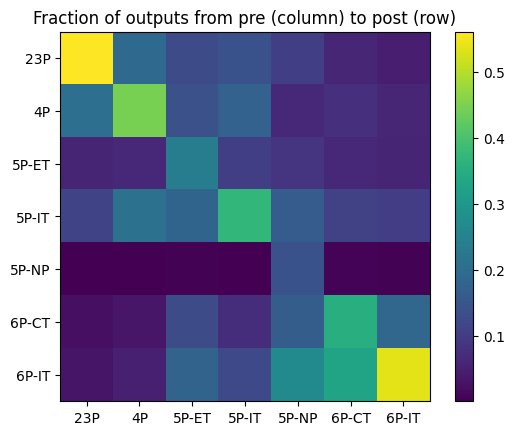

In [71]:
# NOTE: Columns are pre-synaptic cell type, rows are post-synaptic cell type

# Plot the matrix
fig, ax = plt.subplots()
im = ax.imshow(synapse_prob)

# We want to show all ticks...
ax.set_xticks(np.arange(7))
ax.set_yticks(np.arange(7))
# ... and label them with the respective list entries
ax.set_xticklabels(synapse_counts['cell_type_post'].tolist())
ax.set_yticklabels(synapse_counts['cell_type_post'].tolist())

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

ax.set_title('Fraction of outputs from pre (column) to post (row)')

In [72]:
cells_by_ct = cells.groupby(['cell_type'])
cell_counts = cells_by_ct.size().reset_index(name='count')

In [12]:
display(synapses_by_ct.first())

,pre_pt_root_id,post_pt_root_id,size,ctr_pt_position,cell_type_pre,pt_x_pre,pt_y_pre,pt_z_pre,pt_x_post,pt_y_post,pt_z_post,x_diff,y_diff,z_diff
cell_type_post,,,,,,,,,,,,,,
23P,864691135564683351,864691136811959667,960,[159402 92838 18005],23P,139312,142640,18313,197936,120992,19511,-234.496,86.592,-47.92
4P,864691135850460615,864691135544369960,3760,[226118 186894 23218],5P-IT,226352,197136,23621,220064,207568,24033,25.152,-41.728,-16.48
5P-ET,864691135837192851,864691137197197121,25272,[224516 197026 25563],4P,219312,147296,25809,226736,203776,22834,-29.696,-225.920,119.00
5P-IT,864691135858682472,864691135925929998,12096,[244034 201844 23242],6P-IT,203824,222816,26742,227952,207568,21998,-96.512,60.992,189.76
5P-NP,864691134964467743,864691134964467743,236,[216230 207956 24787],5P-NP,215760,207520,24846,215760,207520,24846,0.000,0.000,0.00
6P-CT,864691135864737500,864691135864703196,196,[225492 202020 21043],23P,212352,138224,25629,216272,208224,22075,-15.680,-280.000,142.16
6P-IT,864691135615761513,864691135644665839,1868,[212640 210708 22414],6P-IT,197536,222816,22640,217952,208224,22275,-81.664,58.368,14.60


In [73]:
synapse_counts['cell_type_post'].tolist()

['23P', '4P', '5P-ET', '5P-IT', '5P-NP', '6P-CT', '6P-IT']

In [74]:
print(synapse_counts)

  cell_type_post    count
0            23P  1410996
1             4P  1240326
2          5P-ET   431505
3          5P-IT  1025179
4          5P-NP    16841
5          6P-CT   481121
6          6P-IT   815841


<Figure size 640x480 with 0 Axes>

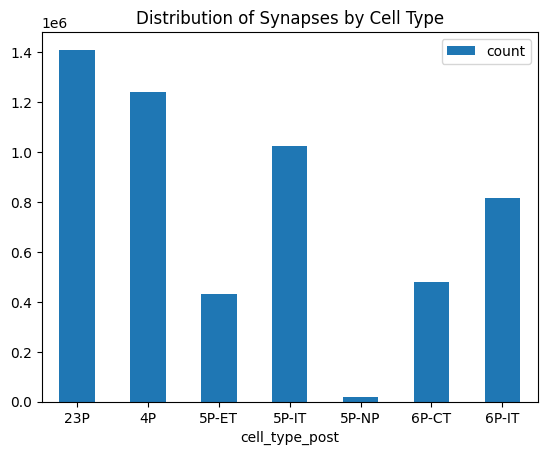

In [75]:
plt.figure()
synapse_counts.plot.bar(x='cell_type_post', y='count', rot=0)
plt.title('Distribution of Synapses by Cell Type')
plt.show()

In [16]:
print(cell_counts)

  cell_type  count
0       23P  17308
1        4P  12969
2     5P-ET   1429
3     5P-IT   8576
4     5P-NP    437
5     6P-CT   5414
6     6P-IT  10076


<Figure size 640x480 with 0 Axes>

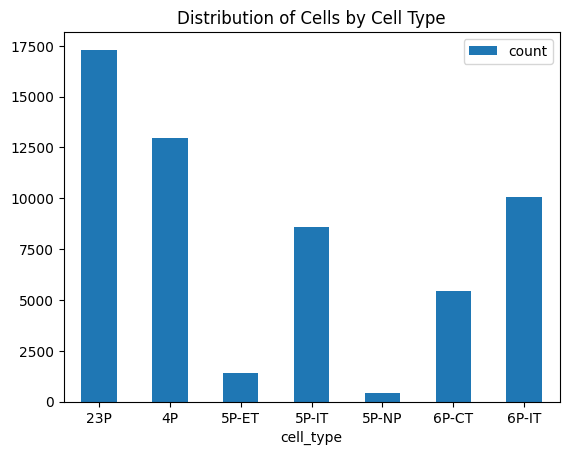

In [77]:
plt.figure()
cell_counts.plot.bar(x='cell_type', y='count', rot=0)
plt.title('Distribution of Cells by Cell Type')
plt.show()

In [78]:
# Divide synapse counts by cell counts to get synapse density
synapse_density = synapse_counts['count'] / cell_counts['count']
cell_counts['synapse_count'] = synapse_counts['count']
cell_counts['density'] = synapse_density

print(cell_counts)

  cell_type  count  synapse_count     density
0       23P  17308        1410996   81.522764
1        4P  12969        1240326   95.637752
2     5P-ET   1429         431505  301.962911
3     5P-IT   8576        1025179  119.540462
4     5P-NP    437          16841   38.537757
5     6P-CT   5414         481121   88.866088
6     6P-IT  10076         815841   80.968738


In [79]:
avg_synapses_per_cell = len(synapses) / len(cells)
print('Average synapses per cell: ', avg_synapses_per_cell)

Average synapses per cell:  96.45802273657243


In [84]:
count_sems = [0.40, 0.51, 4.97, 0.87, 1.18, 0.63, 0.50]

In [85]:
cell_counts['SEM'] = count_sems

In [86]:
display(cell_counts)

,cell_type,count,synapse_count,density,SEM
0,23P,17308,1410996,81.522764,0.40
1,4P,12969,1240326,95.637752,0.51
2,5P-ET,1429,431505,301.962911,4.97
3,5P-IT,8576,1025179,119.540462,0.87
4,5P-NP,437,16841,38.537757,1.18
5,6P-CT,5414,481121,88.866088,0.63
6,6P-IT,10076,815841,80.968738,0.50


<Figure size 640x480 with 0 Axes>

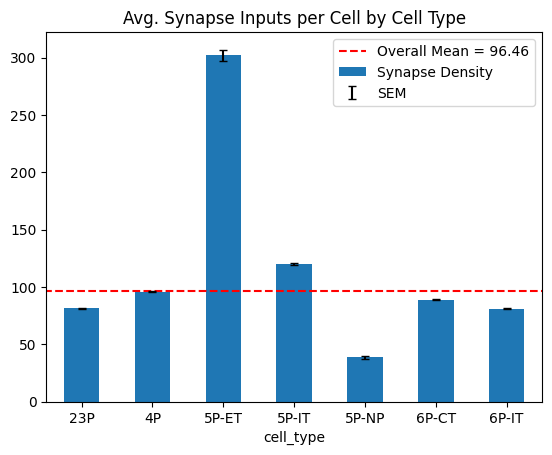

In [92]:
plt.figure()
cell_counts.plot.bar(x='cell_type', y='density', rot=0, label='Synapse Density')
plt.hlines(y=avg_synapses_per_cell, xmin=-1, xmax=10, colors='r', linestyles='dashed', label=f'Overall Mean = {avg_synapses_per_cell:.2f}')
plt.errorbar(x=cell_counts['cell_type'].to_numpy(),
             y=cell_counts['density'].to_numpy(),
             yerr=cell_counts['SEM'].to_numpy(),
             fmt='none', ecolor='black', capsize=3, label='SEM')

plt.title('Avg. Synapse Inputs per Cell by Cell Type')
plt.legend()
plt.show()

In [198]:
# NEXT STAGE: Analyze mags by cell type
cell_types = cells['cell_type'].unique().tolist()
print(cell_types)

all_PDFs = []
all_CDFs = []
all_bins = []

['23P', '4P', '6P-IT', '6P-CT', '5P-IT', '5P-NP', '5P-ET']


In [271]:
cell_type = cell_types[6]
synapse_data = synapses_by_ct.get_group(cell_type)
print(synapse_data.shape)

(516156, 15)


In [272]:
displacements = synapse_data[['x_diff', 'y_diff', 'z_diff']].to_numpy()
print(displacements.shape)

(516156, 3)


In [273]:
# Step 0: Remove any displacements of 0 (for some reason I chose to be really thorough here)
self_connections1 = synapse_data[synapse_data['pre_pt_root_id'] == synapse_data['post_pt_root_id']]
self_connections = displacements[np.all(displacements == 0, axis=1)]
displacements = displacements[~np.all(displacements == 0, axis=1)]
print(f'Self connections method 1: {len(self_connections)}')
print(f'Self connections method 2: {len(self_connections1)}')
print(f'Non-self connections: {len(displacements)}')

Self connections method 1: 52990
Self connections method 2: 52990
Non-self connections: 463166


In [274]:
# Step 1: Zero center the displacements
print(displacements.mean(axis=0))
print(np.linalg.norm(displacements.mean(axis=0)))
displacements -= displacements.mean(axis=0)
print(displacements.mean(axis=0))
print(np.linalg.norm(displacements.mean(axis=0)))

[-11.86643358 -98.96355929   0.11586015]
99.67252248066367
[-1.05523072e-12 -1.90085221e-12 -4.35736744e-13]
2.217344693432346e-12


In [275]:
# Step 2: Compute the covariance matrix
covariance_matrix = np.cov(displacements.T)
print(covariance_matrix)

[[16959.79342133   730.64858211  -483.76937518]
 [  730.64858211 23175.51271241  2010.07098155]
 [ -483.76937518  2010.07098155  8300.91609378]]


In [276]:
# Step 3: Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print(f'Eigenvalues: {eigenvalues}')

# Step 3.5: Sort the eigenvalues and eigenvectors in descending order
eigenvalues_sorted = np.sort(eigenvalues)[::-1]
eigenvectors_sorted = eigenvectors[:, eigenvalues.argsort()[::-1]]

# Step 4: Compute the explained variance
explained_variance = eigenvalues_sorted / eigenvalues_sorted.sum()
print(f'Explained Variance: {explained_variance}')

Eigenvalues: [16930.03501249 23509.21117542  7996.97603961]
Explained Variance: [0.48536426 0.34953252 0.16510322]


In [277]:
# Step 6: Correct skew in displacement data by multiplying by the inverse of the covariance matrix
displacements_corrected = np.matmul(np.linalg.inv(covariance_matrix), displacements.T).T

# Step 7: Compute the covariance matrix of the corrected displacements
covariance_matrix_corrected = np.cov(displacements_corrected.T)
print(covariance_matrix_corrected)

# Step 8: Compute the eigenvalues and eigenvectors of the corrected covariance matrix
eigenvalues_corrected, eigenvectors_corrected = np.linalg.eig(covariance_matrix_corrected)
print(f'Eigenvalues: {eigenvalues_corrected}')

[[ 5.91718743e-05 -2.21102900e-06  3.98388148e-06]
 [-2.21102900e-06  4.41572797e-05 -1.08215640e-05]
 [ 3.98388148e-06 -1.08215640e-05  1.23321255e-04]]
Eigenvalues: [1.25047267e-04 5.90666233e-05 4.25365187e-05]


In [278]:
# Step 9: Calculate the magnitude of the corrected displacements
mags = np.linalg.norm(displacements_corrected, axis=1)
mags_std = np.std(mags)
mags_mean = np.mean(mags)

# Step 10: Visualize

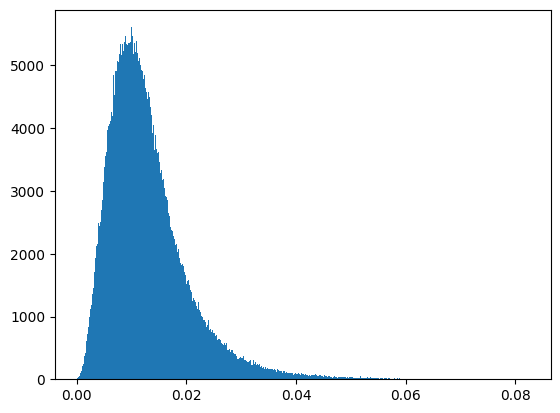

In [279]:
# Magnitude Distribution
num_bins = 500
values, bins, _ = plt.hist(mags, bins=num_bins)
# plt.vlines(mags_mean, 0, max(values), colors='r', label=f'Mean = {mags_mean:.2f}')
# plt.errorbar(mags_mean, max(values), xerr=mags_std, color='r', capsize=5, label='Std = {:.2f}'.format(mags_std))
# # plt.vlines(mags_mean + mags_std, 0, max(values), colors='g', label='Mean + Std')
# # plt.vlines(mags_mean - mags_std, 0, max(values), colors='g', label='Mean - Std')
# plt.title(f'{cell_type} Magnitudes Distribution')
# plt.xlabel('Magnitude')
# plt.ylabel('Frequency')
# plt.legend()
# plt.show()

In [280]:
# IMPORTANT: Here are the PDF and CDF of the magnitudes
mags_PDF = values / np.sum(values)
mags_CDF = np.cumsum(mags_PDF)

all_PDFs.append(mags_PDF)
all_CDFs.append(mags_CDF)
all_bins.append(bins)

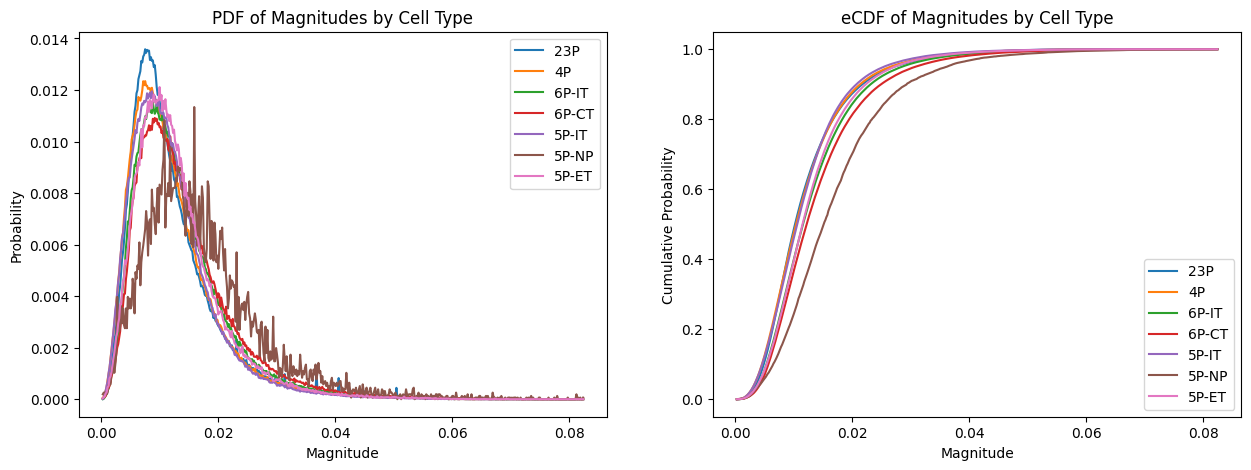

In [295]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
for i, (bin, PDF, CDF) in enumerate(zip(all_bins, all_PDFs, all_CDFs)):
    ax1.plot(bins[1:], PDF, label=cell_types[i])
    ax2.plot(bins[1:], CDF, label=cell_types[i])

ax1.set_title('PDF of Magnitudes by Cell Type')
ax1.set_xlabel('Magnitude')
ax1.set_ylabel('Probability')
ax1.legend()

ax2.set_title('eCDF of Magnitudes by Cell Type')
ax2.set_xlabel('Magnitude')
ax2.set_ylabel('Cumulative Probability')
ax2.legend()
plt.show()

In [282]:
# # Plot the PDF and CDF of the magnitudes
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
# ax1.plot(bins[1:], mags_PDF, label='Data')
# ax1.set_title(f'{cell_type} Magnitudes \'PMF\'')
# ax1.set_xlabel('Magnitude')
# ax1.set_ylabel('Probability')
# ax1.legend()

# ax2.plot(bins[1:], mags_CDF, label='Data')
# ax2.set_title(f'{cell_type} Magnitudes eCDF')
# ax2.set_xlabel('Magnitude')
# ax2.set_ylabel('Cumulative Probability')
# ax2.legend()
# plt.show()